# DAVE3625-1 Assignment 1

Assignment done by:
* Andreas Sandvik Solli (s364747)
* Christoffer Christensen Naug (s364714)
* Eirik JørgensenEirik Jørgensen (s358857)

Most of the code has been retrieved from [Lab 3](https://github.com/atikagondal/Lab-2023-DAVE3625/tree/main/Lab3), with some additional code added or changed to fulfill the tasks. Most of the task 2 code and comments have been left out due to issues with packages, specifically Laundromat.

## Task 1 - Generating Fake Data

Import all neccesary packages and modules.

In [63]:
from faker import Faker
import pandas as pd
#from laundromat.spacy.spacy_model import SpacyModel
from faker.providers.credit_card import Provider as CreditCardProvider #Add creditcards to faker

Load faker and set the locale to be Norwegian

In [64]:
fake = Faker(['no_NO'])

Here we create the dataframe from the package Pandas and define the columns that will be used for storing data later.

In [65]:
df = pd.DataFrame(columns=['Navn','Adresse','PersonNr', 'CreditCard', 'ipv4']) 

The for loop below creates 100 fake identities and inserts them into the dataframe previously specified.

In [66]:
for i in range(100):
    row = fake.name(),fake.address(),fake.ssn(),fake.credit_card_number(),fake.ipv4()
    df.loc[i]=row

Using `df.head(10)` we print out 10 lines of the dataframe just to see that the data has been generated and that the data is added to the corresponding columns.

In [67]:
df.head(10)

Navn                                 Adresse  \
0          Vilde Sørensen       Brekkehaugen 22, 8777 Solveighavn   
1  Bjørg-Hege Christensen               Hagenmarka 3, 7924 Jensen   
2           Tom-Magne Ali           Sivertsenmyra 264, 9477 Ahmed   
3          Sondre Helland      Andreassenskrenten 73, 6716 Nguyen   
4             Magnus Lund         Kristensengrenda 5B, 8208 Tomøy   
5             Kristin Bøe         Eriksenåsen 63, 7892 Tobiashamn   
6       Elise-Linn Sæther                 Dahlkroken 6, 4932 Dahl   
7        Ragnhild Ødegård  Gulbrandsenstubben 87A, 1142 Tonefjord   
8           Eirik Evensen        Arnesengrenda 408, 4725 Haugland   
9    Bente-Karoline Hagen         Thorsenbakken 36H, 0809 Thorsen   

      PersonNr        CreditCard            ipv4  
0  04117120533  4838695247259036   108.194.50.49  
1  22107830697  4898218339733334    156.85.99.84  
2  12096522302   180085492051431      74.45.91.1  
3  24018931369   213167414821272  188.77.140.214  
4  08017545427    30479106635220  134.239.165.60  
5  15020476920      582097997222  101.110.89.190  
6  09113732323   379568830969514    191.183.6.96  
7  28055643220   213152113331419   113.66.77.232  
8  28026823023  6011549612614859  91.113.229.103  
9  09127048638  3559415079782222  223.128.224.75

## Task 2 - Anonymization

Firstly a new array is generated called `textArray`. Then using a for loop we go through the entire dataframe and create a string using the different columns for each of the row. In this case we use the name, address, SSN and credit card to make a somewhat believable string that could perhaps be sent in an email or a chat-system.

In [68]:
textArray = [] #Create a empty array
# Do a for loop, and assign values to name and adress
for index, row in df.iterrows():
    name = row["Navn"] 
    adress = row["Adresse"]
    ssn = row["PersonNr"]
    cc = row["CreditCard"]
    #Using f string we can now create a new string with the values, and
    #append (add) that string to the text array
    textArray.append(f'Hi, my name is {name}. I wonder if you deliver to {adress}. My credit card nr is {cc} and my ssn is {ssn}')

## Task 3 - Time series

Import the required libraries and packages

In [69]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Define the path from where the flight data is imported. In this case the file is stored in the `data` subfolder with the name `flight.csv`.

In [70]:
url = "data/flight.csv"

Create a dataframe and use the pandas package to read the csv file from the previously defined path.

In [71]:
df = pd.read_csv(url)

Using the head method which will print out a neatly formatted table using rows and columns. The first column is unnamed as the name is not defined in the CSV file unlike the other columns.

In [72]:
df.head()

Unnamed: 0       datetime_val           dep_time           arr_time  \
0           0  2013-1-1 05:40:00  2013-1-1 05:42:00  2013-1-1 09:23:00   
1           1  2013-1-1 06:00:00  2013-1-1 05:54:00  2013-1-1 08:12:00   
2           2  2013-1-1 05:58:00  2013-1-1 05:54:00  2013-1-1 07:40:00   
3           3  2013-1-1 06:00:00  2013-1-1 05:55:00  2013-1-1 09:13:00   
4           4  2013-1-1 06:00:00  2013-1-1 05:57:00  2013-1-1 08:38:00   

      sched_arr_time  flight origin dest  
0  2013-1-1 08:50:00    1141    JFK  MIA  
1  2013-1-1 08:37:00     461    LGA  ATL  
2  2013-1-1 07:28:00    1696    EWR  ORD  
3  2013-1-1 08:54:00     507    EWR  FLL  
4  2013-1-1 08:46:00      79    JFK  MCO

The code below will use pandas to convert the data from the different series into a different type, in this case a datetime type. If the value can not be converted, it will simply use the method defined in `error`, in this case `coerce` to set it as NaT, also known as a missing value.

In [73]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce') 
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')
#or use errors='coerce' to put a NaT value (NaT = dummy var for missing value)

To start of the code below will iterate throw the dataframe using the iterrows method that iterates through all the rows, similar to how a for loop such as

```python
for num in range(100)
```
would go from 0-99. 

For each row we check if the arrival time is less then the depature time and if so add an extra day to prevent. The same is done for the scheduled arrival time.

In [74]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)
        

Below two things are calculated, the air time and the delay of the flight.

The air time is calculated by subtracting the arrival time from the departure time and add it to a new column in the dataframe called `air_time`.
The delay of the flight is calculated by subtracting the arrival time from the scheduled arrival time and insert into a new column called `delay`.

In [75]:
df['air_time'] = df["arr_time"]-df["dep_time"]
df['delay'] = df["arr_time"]-df["sched_arr_time"]

Using `df` simply prints the table out to the console.

In [76]:
df

Unnamed: 0        datetime_val            dep_time  \
0                0 2013-01-01 05:40:00 2013-01-01 05:42:00   
1                1 2013-01-01 06:00:00 2013-01-01 05:54:00   
2                2 2013-01-01 05:58:00 2013-01-01 05:54:00   
3                3 2013-01-01 06:00:00 2013-01-01 05:55:00   
4                4 2013-01-01 06:00:00 2013-01-01 05:57:00   
...            ...                 ...                 ...   
121422      123979 2013-09-30 21:37:00 2013-09-30 21:47:00   
121423      123980 2013-09-30 21:56:00 2013-09-30 21:49:00   
121424      123981 2013-09-30 21:13:00 2013-09-30 22:33:00   
121425      123982 2013-09-30 20:01:00 2013-09-30 22:35:00   
121426      123983 2013-09-30 22:55:00 2013-09-30 23:07:00   

                  arr_time      sched_arr_time  flight origin dest  \
0      2013-01-01 09:23:00 2013-01-01 08:50:00    1141    JFK  MIA   
1      2013-01-01 08:12:00 2013-01-01 08:37:00     461    LGA  ATL   
2      2013-01-01 07:40:00 2013-01-01 07:28:00    1696    EWR  ORD   
3      2013-01-01 09:13:00 2013-01-01 08:54:00     507    EWR  FLL   
4      2013-01-01 08:38:00 2013-01-01 08:46:00      79    JFK  MCO   
...                    ...                 ...     ...    ...  ...   
121422 2013-10-01 00:30:00 2013-10-01 00:27:00    1371    LGA  FLL   
121423 2013-09-30 22:45:00 2013-09-30 23:08:00     523    EWR  BOS   
121424 2013-10-01 01:12:00 2013-10-01 00:30:00     471    EWR  SFO   
121425 2013-10-01 00:59:00 2013-09-30 22:49:00    1083    JFK  MCO   
121426 2013-09-30 23:59:00 2013-09-30 23:58:00     718    JFK  BOS   

              air_time             delay  
0      0 days 03:41:00   0 days 00:33:00  
1      0 days 02:18:00 -1 days +23:35:00  
2      0 days 01:46:00   0 days 00:12:00  
3      0 days 03:18:00   0 days 00:19:00  
4      0 days 02:41:00 -1 days +23:52:00  
...                ...               ...  
121422 0 days 02:43:00   0 days 00:03:00  
121423 0 days 00:56:00 -1 days +23:37:00  
121424 0 days 02:39:00   0 days 00:42:00  
121425 0 days 02:24:00   0 days 02:10:00  
121426 0 days 00:52:00   0 days 00:01:00  

[121427 rows x 10 columns]

Again, we loop through all the rows of the dataframe. This time we check if the days in air time is negative. If the time is negative, we start with 24 hours using timedelta and then subtract the amount of air time. Then the value is inserted back into airtime.

In [77]:
#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        #df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'])

Using the `to_csv` method we create a new csv file with the data from the dataframe called `ts2.csv`

In [78]:
df.to_csv("t2s.csv")

The code below simply defined two variables, `airt` and `dela` for air time and delay respectivly. These values are then printed out.

In [79]:
airt = df.loc[1, 'air_time']
dela = df.loc[1, 'delay']
print(airt, dela)

0 days 02:18:00 -1 days +23:35:00


Using 100 as a starting percentage, we times that by the delay and divid by airtime to calculate how much the flight was delayed by, in percent.

In [80]:
(100*dela)/airt

-18.115942028985508

The code below does the same, but this time for the entire dataframe so we can get the value for each of the flights.

In [81]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']

Again, using the head method which will print out a neatly formatted table using rows and columns. The first column is unnamed as the name is not defined in the CSV file unlike the other columns.

In [82]:
df.head()

Unnamed: 0        datetime_val            dep_time            arr_time  \
0           0 2013-01-01 05:40:00 2013-01-01 05:42:00 2013-01-01 09:23:00   
1           1 2013-01-01 06:00:00 2013-01-01 05:54:00 2013-01-01 08:12:00   
2           2 2013-01-01 05:58:00 2013-01-01 05:54:00 2013-01-01 07:40:00   
3           3 2013-01-01 06:00:00 2013-01-01 05:55:00 2013-01-01 09:13:00   
4           4 2013-01-01 06:00:00 2013-01-01 05:57:00 2013-01-01 08:38:00   

       sched_arr_time  flight origin dest        air_time             delay  \
0 2013-01-01 08:50:00    1141    JFK  MIA 0 days 03:41:00   0 days 00:33:00   
1 2013-01-01 08:37:00     461    LGA  ATL 0 days 02:18:00 -1 days +23:35:00   
2 2013-01-01 07:28:00    1696    EWR  ORD 0 days 01:46:00   0 days 00:12:00   
3 2013-01-01 08:54:00     507    EWR  FLL 0 days 03:18:00   0 days 00:19:00   
4 2013-01-01 08:46:00      79    JFK  MCO 0 days 02:41:00 -1 days +23:52:00   

   percent_delay  
0      14.932127  
1     -18.115942  
2      11.320755  
3       9.595960  
4      -4.968944

Below we list all values in the `percent_delay` column in the dataframe.

In [83]:
df["percent_delay"]

0         14.932127
1        -18.115942
2         11.320755
3          9.595960
4         -4.968944
            ...    
121422     1.840491
121423   -41.071429
121424    26.415094
121425    90.277778
121426     1.923077
Name: percent_delay, Length: 121427, dtype: float64

The same as above but using the describe method to get additional statistics such as the mean delay, min and max. This can help seeing things like averages and can be useful for future analysis.

In [84]:
df["percent_delay"].describe()

count    121373.000000
mean        -29.735566
std         206.591444
min       -2919.565217
25%         -14.838710
50%          -4.864865
75%           6.172840
max         100.000000
Name: percent_delay, dtype: float64

<Axes: >

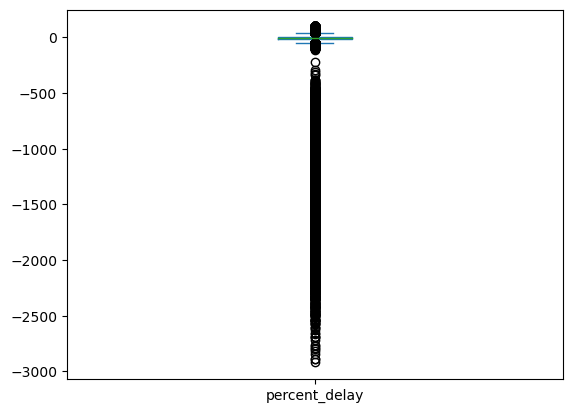

In [85]:
df["percent_delay"].plot.box()

We create a new dataframe from what is returned from the argmin() function. The argmin function returns the row where the minimum value is located for our percent_delay column.

In [86]:
minrow= df['percent_delay'].argmin()

We then print the minrow.

In [87]:
df.iloc[minrow]

Unnamed: 0                      60788
datetime_val      2013-04-01 20:40:00
dep_time          2013-04-01 22:45:00
arr_time          2013-04-01 23:31:00
sched_arr_time    2013-04-02 21:54:00
flight                           1178
origin                            EWR
dest                              BOS
air_time              0 days 00:46:00
delay               -1 days +01:37:00
percent_delay            -2919.565217
Name: 59583, dtype: object

We import the is_numeric_dtype from pandas. Then we define a function that determiner what the lower and upper percentiles are as a bounds for identifying outliers. quant_df calculaties quantiles based on our bounds. We then filter to only keep the rows that are within our bound and then return the modified dataframe.

In [88]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df


We run the remove outliers on our percent_delay column.

In [89]:
df["percent_delay"] = remove_outlier(df["percent_delay"])

We extract the column "percent_delay" and use describe to display various summary statistics for the column. What we get is, all the values that are not null, the average value, how much the spread is (standard deviation), the minimum value, the max value, and all the percentile values.

In [90]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64

We create a line chart which is useful to show pattern and trends over time. 

<Axes: >

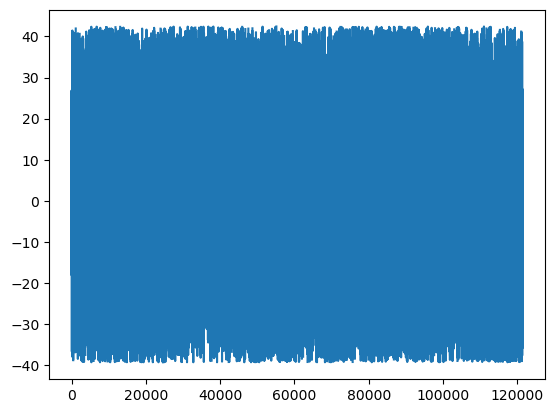

In [91]:
df["percent_delay"].plot.line()

We create a plot box or box and whisker plot, showing spread, central tendency and potential outliers. 

<Axes: >

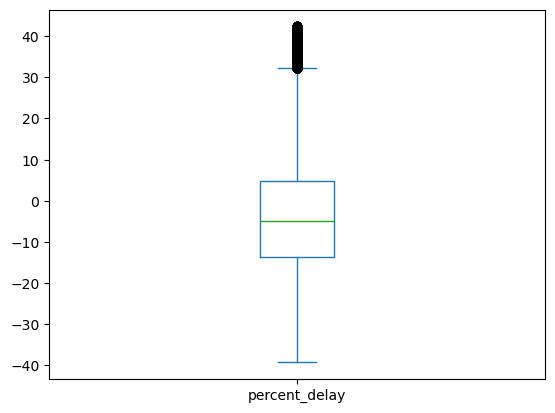

In [92]:
df["percent_delay"].plot.box()

We extract the column "percent_delay" and use describe to display various summary statistics for the column. What we get is, all the values that are not null, the average value, how much the spread is (standard deviation), the minimum value, the max value, and all the percentile values.

In [93]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64